In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
import urllib.request
from PIL import Image
# Thêm các thư viện cần dùng

In [10]:
# Load hình ảnh
url = "https://i.ibb.co/1JKXyZqc/meow-kitty-silly-cat-kittyuh.jpg"
with urllib.request.urlopen(url) as url:
    image_read = Image.open(url)

# Chỉnh thành trắng đen để dễ xử lý hơn với hàm np.mean()
# Trộn cả ba màu R, G, B lại ta sẽ được thay vì 3 thông số, ta sẽ có một thông số duy nhất, ta sẽ gọi nó là độ sáng: [255, 0, 0] (đỏ) -> (255+0+0)/3 = 85 -> xám đậm
grey_scaled = np.mean(image_read, -1)

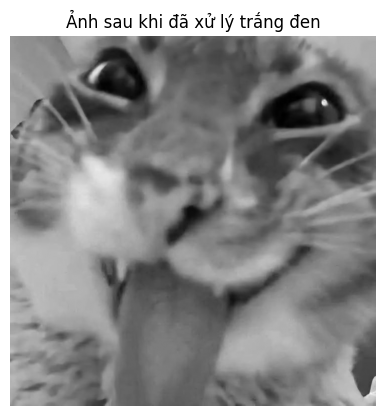

In [11]:
img = plt.imshow(grey_scaled)
img.set_cmap('grey')
plt.axis("off")
plt.title("Ảnh sau khi đã xử lý trắng đen")
plt.show(img)


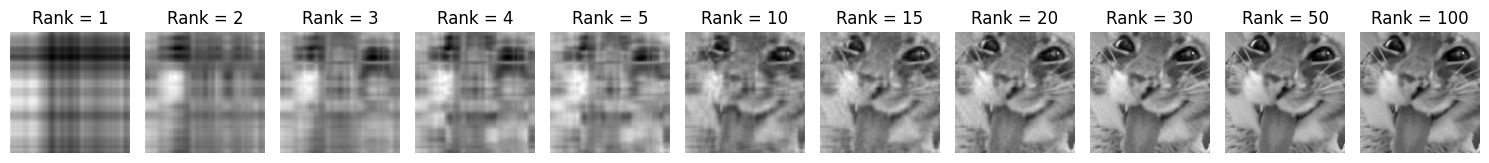

In [12]:
# Phân tích SVD bằng thư viện numpy
U, S, VT = np.linalg.svd(grey_scaled, full_matrices=False)

# Do hàm .svd() trả về S là một ma trận có dạng A = [1,2, 3, ..., n]
S = np.diag(S)
# Sử dụng np.diag(S) ta sẽ có được ma trận chéo dạng A = [[1, 0, 0, ...],[0, 2, 0, ...],[0, 0, 3, ...]]


ranks = [1, 2, 3, 4, 5, 10, 15, 20, 30, 50,100] # Các bước nhảy "k" để quan sát

plt.figure(figsize=(15, 8))

for i, r in enumerate(ranks, 1):
    Ak = U[:, :r] @ S[:r, :r] @ VT[:r, :] # Left Singular Value [lấy đến cột r] * Scalar Matrix (Sigma) [lấy đến hàng r, cột r] * Right Singular Value [lấy đến hàng r]
    plt.subplot(1, len(ranks), i)
    plt.imshow(Ak, cmap="gray")
    plt.title(f"Rank = {r}")
    plt.axis("off")

plt.tight_layout()
plt.show() # Hiển thị plot

